In [1]:
# %%
import numpy as np
import sys
import os
import re
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [2]:

# –î–æ–±–∞–≤–ª—è–µ–º –ø—É—Ç—å –∫ –Ω–∞—à–µ–π –ø–µ—Å–æ—á–Ω–∏—Ü–µ –µ—Å–ª–∏ –Ω—É–∂–Ω–æ
current_dir = os.getcwd()  # –ø—É—Ç—å –∫ notebooks
optimization_path = r"src"
if optimization_path not in sys.path:
    sys.path.append(optimization_path)

In [3]:
from src.spore_tree_config import SporeTreeConfig
from src.spore_tree import SporeTree
from src.pendulum import PendulumSystem
from src.visualize_spore_tree import visualize_spore_tree
from src.tree_evaluator import TreeEvaluator

In [4]:
pendulum = PendulumSystem(
    g=9.81,
    l=2.0, 
    m=1.0,
    damping=0.1,
    max_control=2.0
)

init_position = np.array([np.pi/2, 0])

cfg = SporeTreeConfig(
    initial_position=np.array([np.pi/2, 0.0]),
    dt_base=0.1,
    dt_grandchildren_factor=0.1,
    figure_size=(10, 10)
)
cfg.validate()

True

In [5]:
def take_time_sign(grandchild):
    """
    –ò–∑–≤–ª–µ–∫–∞–µ—Ç —Å–ª–æ–≤–æ –ø–æ—Å–ª–µ –ø–æ—Å–ª–µ–¥–Ω–µ–≥–æ –ø–æ–¥—á–µ—Ä–∫–∏–≤–∞–Ω–∏—è –∏–∑ –ø–æ–ª—è 'name' –∫–∞–∂–¥–æ–≥–æ –≤–Ω—É–∫–∞.
    –í–æ–∑–≤—Ä–∞—â–∞–µ—Ç —Å–ø–∏—Å–æ–∫ —ç—Ç–∏—Ö —Å–ª–æ–≤.
    """
    
    name = grandchild['name']
    match = re.search(r'_([^_]+)$', name)
    if match.group(1) == 'forward':
        return 1
    elif match.group(1) == 'backward':
        return -1
    else:
        raise ValueError(f"–ù–µ–∏–∑–≤–µ—Å—Ç–Ω—ã–π –∑–Ω–∞–∫ –≤—Ä–µ–º–µ–Ω–∏: {match}")

# take_time_sign(grandchildren[1])

# %%

In [ ]:
def draw_quad(state, time_sign,control, control_dot=0, N = 10, max_dt=0.1):
    quad_poses = [state]

    time = np.linspace(0, max_dt, N+1)
    for i in range(1,N+1):
        quad_poses.append(pendulum.quad_step(quad_poses[-1], control, 0, time_sign*time[i]))
        
    return np.array(quad_poses)

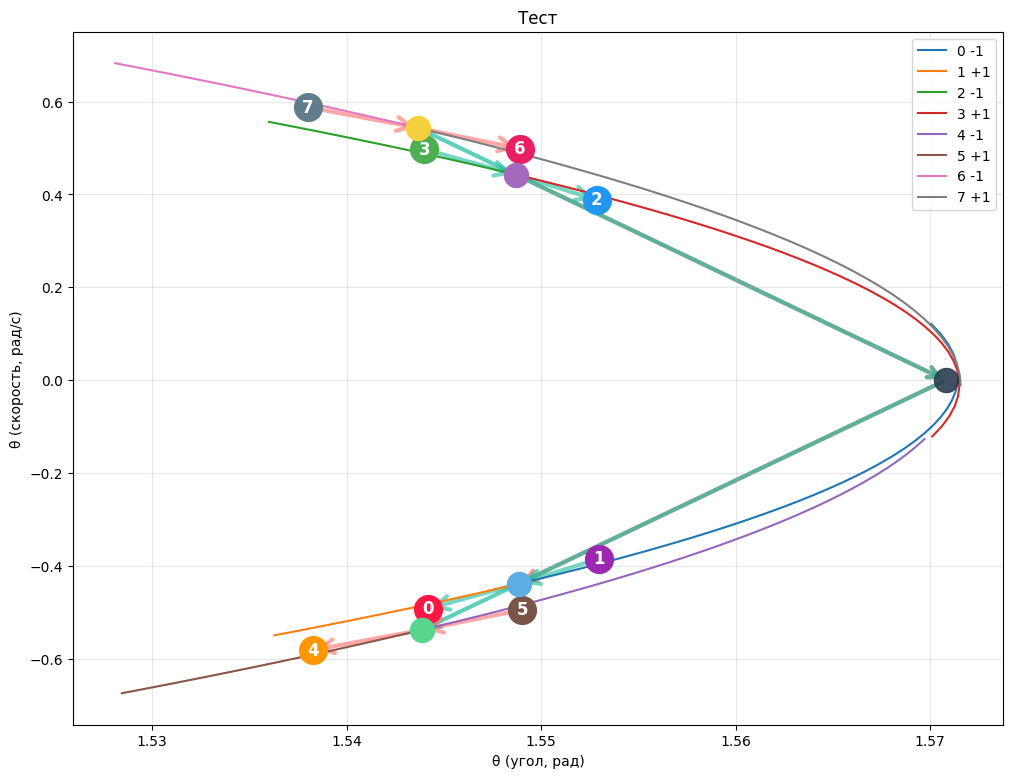

In [66]:
tree = SporeTree(pendulum, cfg)
children = tree.create_children(show=False)
grandchildren = tree.create_grandchildren(show=False)
tree.sort_and_pair_grandchildren()
tree.calculate_mean_points()

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# 2. –ö—ç—à-–æ—Ü–µ–Ω—â–∏–∫ –Ω–∞ –æ—Å–Ω–æ–≤–µ –¥–µ—Ä–µ–≤–∞
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
visualize_spore_tree(tree, "–¢–µ—Å—Ç")






dts = [0.005, 0.001, 0.001, 0.005, 0.003, 0.001, 0.001, 0.004]
for i in range(len(children)):
    poses_1 = draw_quad(state=children[i]['position'], time_sign=-1, control=children[i]['control'], N=50, max_dt=dts[2*i])
    poses_2 = draw_quad(state=children[i]['position'], time_sign=+1, control=children[i]['control'], N=50, max_dt=dts[2*i+1])
    plt.plot(poses_1[:, 0], poses_1[:, 1], label=f'{2*i} -1')
    plt.plot(poses_2[:, 0], poses_2[:, 1], label=f'{2*i+1} +1')
plt.legend()


In [ ]:
def draw_rk(pendulumstate, time_sign, control, N = 50, total_dt=0.01):
    poses = [state]

    for i in range(1, N+1):
        poses.append(pendulum.step(poses[-1], control, time_sign*total_dt/N*i))

    return np.array(poses)

In [197]:
init_position = np.array([np.pi/2, 0])

cfg = SporeTreeConfig(
    initial_position=init_position,
    dt_base=0.1,
    dt_grandchildren_factor=0.1,
    figure_size=(10, 10)
)
cfg.validate()

True

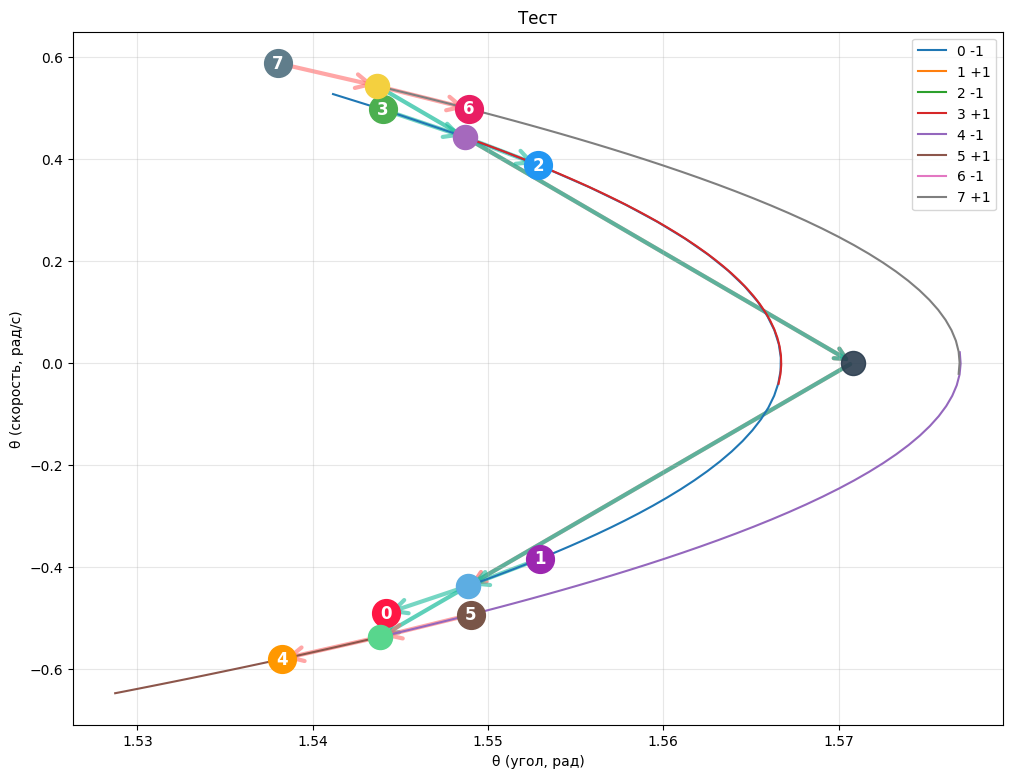

In [198]:
tree = SporeTree(pendulum, cfg)
children = tree.create_children(show=False)
grandchildren = tree.create_grandchildren(show=False)
tree.sort_and_pair_grandchildren()
tree.calculate_mean_points()

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# 2. –ö—ç—à-–æ—Ü–µ–Ω—â–∏–∫ –Ω–∞ –æ—Å–Ω–æ–≤–µ –¥–µ—Ä–µ–≤–∞
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
visualize_spore_tree(tree, "–¢–µ—Å—Ç")



dts = [0.007, 0.00, 0.00, 0.0035, 0.005, 0.001, 0.00, 0.005]
for i in range(len(children)):
    poses_1 = draw_rk(state=children[i]['position'], time_sign=-1, control=-children[i]['control'], total_dt=dts[2*i])
    poses_2 = draw_rk(state=children[i]['position'], time_sign=+1, control=-children[i]['control'], total_dt=dts[2*i+1])
    plt.plot(poses_1[:, 0], poses_1[:, 1], label=f'{2*i} -1')
    plt.plot(poses_2[:, 0], poses_2[:, 1], label=f'{2*i+1} +1')
plt.legend()


In [ ]:
      gc_0  gc_1  gc_2  gc_3  gc_4  gc_5  gc_6  gc_7
gc_0     0     1    -1     1    -1     1     1     1
gc_1     1     0    -1     1     1     1    -1    -1
gc_2    -1    -1     0     1    -1    -1     1     1
gc_3     1     1     1     0     1     1     1    -1
gc_4    -1     1    -1     1     0     1    -1     1
gc_5     1     1    -1     1     1     0    -1     1
gc_6     1    -1     1     1    -1    -1     0     1
gc_7     1    -1     1    -1     1     1     1     0
gc_0 –∏ gc_2 –ø–µ—Ä–µ—Å–µ–∫—É—Ç—Å—è!
gc_0 –∏ gc_4 –ø–µ—Ä–µ—Å–µ–∫—É—Ç—Å—è!
gc_1 –∏ gc_2 –ø–µ—Ä–µ—Å–µ–∫—É—Ç—Å—è!
gc_1 –∏ gc_6 –ø–µ—Ä–µ—Å–µ–∫—É—Ç—Å—è!
gc_1 –∏ gc_7 –ø–µ—Ä–µ—Å–µ–∫—É—Ç—Å—è!
gc_2 –∏ gc_4 –ø–µ—Ä–µ—Å–µ–∫—É—Ç—Å—è!
gc_2 –∏ gc_5 –ø–µ—Ä–µ—Å–µ–∫—É—Ç—Å—è!
gc_3 –∏ gc_7 –ø–µ—Ä–µ—Å–µ–∫—É—Ç—Å—è!
gc_4 –∏ gc_6 –ø–µ—Ä–µ—Å–µ–∫—É—Ç—Å—è!
gc_5 –∏ gc_6 –ø–µ—Ä–µ—Å–µ–∫—É—Ç—Å—è!

In [165]:
def compute_phase_acceleration_table(grandchildren, pendulum, show=False):
    """
    –ê–Ω–∞–ª–∏–∑–∏—Ä—É–µ—Ç —Ñ–∞–∑–æ–≤–æ–µ —É—Å–∫–æ—Ä–µ–Ω–∏–µ –≤–Ω—É–∫–æ–≤ —á–µ—Ä–µ–∑ —Ç—Ä–µ—Ç—å—é –ø—Ä–æ–∏–∑–≤–æ–¥–Ω—É—é –º–∞—è—Ç–Ω–∏–∫–∞.
    
    –§–∞–∑–æ–≤–æ–µ —É—Å–∫–æ—Ä–µ–Ω–∏–µ = [Œ∏Ãà, Œ∏‚Éõ] –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç, –∫–∞–∫ –º–µ–Ω—è–µ—Ç—Å—è —Å–∫–æ—Ä–æ—Å—Ç—å —Å–±–ª–∏–∂–µ–Ω–∏—è/—Ä–∞—Å—Ö–æ–∂–¥–µ–Ω–∏—è.
    
    Args:
        grandchildren: —Å–ø–∏—Å–æ–∫ –≤–Ω—É–∫–æ–≤ —Å –ø–æ–ª—è–º–∏ 'position', 'control', 'name'
        pendulum: –æ–±—ä–µ–∫—Ç –º–∞—è—Ç–Ω–∏–∫–∞
        show: –≤—ã–≤–æ–¥–∏—Ç—å —Ç–∞–±–ª–∏—Ü—É
        
    Returns:
        pandas.DataFrame: —Ç–∞–±–ª–∏—Ü–∞ –∑–Ω–∞–∫–æ–≤ –≤—Ç–æ—Ä—ã—Ö –ø—Ä–æ–∏–∑–≤–æ–¥–Ω—ã—Ö —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–π
    """
    import numpy as np
    import pandas as pd
    import re
    
    n = len(grandchildren)
    signs_table = np.zeros((n, n), dtype=int)
    
    # –í—ã—á–∏—Å–ª—è–µ–º —Ñ–∞–∑–æ–≤—ã–µ —É—Å–∫–æ—Ä–µ–Ω–∏—è –≤—Å–µ—Ö –≤–Ω—É–∫–æ–≤
    phase_accelerations = []
    for i, gc in enumerate(grandchildren):
        pos = gc['position']
        control = gc['control']
        
        # –û–ø—Ä–µ–¥–µ–ª—è–µ–º –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏–µ –≤—Ä–µ–º–µ–Ω–∏
        name = gc.get('name', '')
        match = re.search(r'_([^_]+)$', name)
        if match and match.group(1) == 'forward':
            time_sign = 1
        elif match and match.group(1) == 'backward':
            time_sign = -1
        else:
            time_sign = gc.get('time_sign', 1)
        
        # –ü–æ–ª—É—á–∞–µ–º –≤—Å–µ –ø—Ä–æ–∏–∑–≤–æ–¥–Ω—ã–µ
        _, theta_ddot, theta_dddot = pendulum.get_all_derivatives(pos, control)
        
        # –§–∞–∑–æ–≤–æ–µ —É—Å–∫–æ—Ä–µ–Ω–∏–µ = [Œ∏Ãà, Œ∏‚Éõ] —Å —É—á–µ—Ç–æ–º –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏—è –≤—Ä–µ–º–µ–Ω–∏
        phase_accel = time_sign * np.array([theta_ddot, theta_dddot])
        phase_accelerations.append(phase_accel)
    
    # –¢–∞–∫–∂–µ –≤—ã—á–∏—Å–ª—è–µ–º —Ñ–∞–∑–æ–≤—ã–µ —Å–∫–æ—Ä–æ—Å—Ç–∏ –¥–ª—è –ø–æ–ª–Ω–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞
    phase_velocities = []
    for i, gc in enumerate(grandchildren):
        pos = gc['position']
        control = gc['control']
        
        name = gc.get('name', '')
        match = re.search(r'_([^_]+)$', name)
        time_sign = 1 if (match and match.group(1) == 'forward') else -1
        
        _, theta_ddot, _ = pendulum.get_all_derivatives(pos, control)
        phase_vel = time_sign * np.array([pos[1], theta_ddot])
        phase_velocities.append(phase_vel)
    
    # –ê–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º –≤—Ç–æ—Ä—É—é –ø—Ä–æ–∏–∑–≤–æ–¥–Ω—É—é —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è –¥–ª—è –≤—Å–µ—Ö –ø–∞—Ä
    for i in range(n):
        for j in range(n):
            if i == j:
                signs_table[i, j] = 0
            else:
                # –ü–æ–∑–∏—Ü–∏–∏, —Å–∫–æ—Ä–æ—Å—Ç–∏ –∏ —É—Å–∫–æ—Ä–µ–Ω–∏—è
                r1 = grandchildren[i]['position']
                r2 = grandchildren[j]['position']
                v1 = phase_velocities[i]
                v2 = phase_velocities[j]
                a1 = phase_accelerations[i]
                a2 = phase_accelerations[j]
                
                # –í–µ–∫—Ç–æ—Ä—ã —Ä–∞–∑–Ω–æ—Å—Ç–∏
                r_diff = r1 - r2
                v_diff = v1 - v2
                a_diff = a1 - a2
                
                # –¢–µ–∫—É—â–µ–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ
                distance = np.linalg.norm(r_diff)
                
                if distance < 1e-10:
                    signs_table[i, j] = 0
                else:
                    # –ü–µ—Ä–≤–∞—è –ø—Ä–æ–∏–∑–≤–æ–¥–Ω–∞—è —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è
                    d_dist_dt = np.dot(r_diff, v_diff) / distance
                    
                    # –í—Ç–æ—Ä–∞—è –ø—Ä–æ–∏–∑–≤–æ–¥–Ω–∞—è —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è (—á–µ—Ä–µ–∑ —É—Å–∫–æ—Ä–µ–Ω–∏–µ)
                    # d¬≤/dt¬≤|r‚ÇÅ-r‚ÇÇ| = [(r‚ÇÅ-r‚ÇÇ)¬∑(a‚ÇÅ-a‚ÇÇ) + |v‚ÇÅ-v‚ÇÇ|¬≤]/|r‚ÇÅ-r‚ÇÇ| - [(r‚ÇÅ-r‚ÇÇ)¬∑(v‚ÇÅ-v‚ÇÇ)]¬≤/|r‚ÇÅ-r‚ÇÇ|¬≥
                    
                    numerator = (np.dot(r_diff, a_diff) + 
                                np.dot(v_diff, v_diff) - 
                                (d_dist_dt**2))
                    
                    d2_dist_dt2 = numerator / distance
                    
                    # –ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è –ø–æ –≤—Ç–æ—Ä–æ–π –ø—Ä–æ–∏–∑–≤–æ–¥–Ω–æ–π
                    if d2_dist_dt2 < -1e-6:
                        signs_table[i, j] = -1  # –£—Å–∫–æ—Ä–µ–Ω–Ω–æ–µ —Å–±–ª–∏–∂–µ–Ω–∏–µ
                    elif d2_dist_dt2 > 1e-6:
                        signs_table[i, j] = 1   # –£—Å–∫–æ—Ä–µ–Ω–Ω–æ–µ —Ä–∞—Å—Ö–æ–∂–¥–µ–Ω–∏–µ  
                    else:
                        signs_table[i, j] = 0   # –ü–æ—Å—Ç–æ—è–Ω–Ω–∞—è —Å–∫–æ—Ä–æ—Å—Ç—å –∏–∑–º–µ–Ω–µ–Ω–∏—è —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è
    
    # –°–æ–∑–¥–∞–µ–º pandas DataFrame
    df = pd.DataFrame(signs_table,
                     index=[f"gc_{i}" for i in range(n)],
                     columns=[f"gc_{i}" for i in range(n)])
    
    if show:
        print("üöÄ –¢–∞–±–ª–∏—Ü–∞ –∑–Ω–∞–∫–æ–≤ –í–¢–û–†–´–• –ø—Ä–æ–∏–∑–≤–æ–¥–Ω—ã—Ö —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–π (—Ñ–∞–∑–æ–≤–æ–µ —É—Å–∫–æ—Ä–µ–Ω–∏–µ):")
        print("   -1: —É—Å–∫–æ—Ä–µ–Ω–Ω–æ–µ —Å–±–ª–∏–∂–µ–Ω–∏–µ ‚áá")
        print("    0: —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ–µ –∏–∑–º–µ–Ω–µ–Ω–∏–µ ‚óè")
        print("   +1: —É—Å–∫–æ—Ä–µ–Ω–Ω–æ–µ —Ä–∞—Å—Ö–æ–∂–¥–µ–Ω–∏–µ ‚áâ")
        print()
        print(df)
    
    return df

In [173]:
def compute_distance_table(grandchildren, show=False):
    """
    –°–æ—Å—Ç–∞–≤–ª—è–µ—Ç —Ç–∞–±–ª–∏—Ü—É —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–π –º–µ–∂–¥—É –≤—Å–µ–º–∏ –ø–∞—Ä–∞–º–∏ –≤–Ω—É–∫–æ–≤ –≤ —Ñ–∞–∑–æ–≤–æ–º –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ.
    
    Args:
        grandchildren: —Å–ø–∏—Å–æ–∫ –≤–Ω—É–∫–æ–≤ —Å –ø–æ–ª—è–º–∏ 'position'
        show: –≤—ã–≤–æ–¥–∏—Ç—å —Ç–∞–±–ª–∏—Ü—É
        
    Returns:
        pandas.DataFrame: —Ç–∞–±–ª–∏—Ü–∞ –µ–≤–∫–ª–∏–¥–æ–≤—ã—Ö —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–π |r_i - r_j|
    """
    import numpy as np
    import pandas as pd
    
    n = len(grandchildren)
    distance_table = np.zeros((n, n))
    
    # –í—ã—á–∏—Å–ª—è–µ–º —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è –¥–ª—è –≤—Å–µ—Ö –ø–∞—Ä
    for i in range(n):
        for j in range(n):
            if i == j:
                distance_table[i, j] = 0.0
            else:
                # –ü–æ–∑–∏—Ü–∏–∏ –≤–Ω—É–∫–æ–≤ –≤ —Ñ–∞–∑–æ–≤–æ–º –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ [theta, theta_dot]
                r1 = grandchildren[i]['position']
                r2 = grandchildren[j]['position']
                
                # –ï–≤–∫–ª–∏–¥–æ–≤–æ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ –≤ —Ñ–∞–∑–æ–≤–æ–º –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ
                distance = np.linalg.norm(r1 - r2)
                distance_table[i, j] = distance
    
    # –°–æ–∑–¥–∞–µ–º pandas DataFrame
    df = pd.DataFrame(distance_table, 
                     index=[f"gc_{i}" for i in range(n)],
                     columns=[f"gc_{i}" for i in range(n)])
    
    if show:
        print("üìè –¢–∞–±–ª–∏—Ü–∞ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–π |r_i - r_j| –≤ —Ñ–∞–∑–æ–≤–æ–º –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ:")
        print("   –ï–≤–∫–ª–∏–¥–æ–≤–æ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ –º–µ–∂–¥—É –ø–æ–∑–∏—Ü–∏—è–º–∏ [Œ∏, Œ∏Ãá]")
        print()
        # –§–æ—Ä–º–∞—Ç–∏—Ä—É–µ–º –≤—ã–≤–æ–¥ —Å 4 –∑–Ω–∞–∫–∞–º–∏ –ø–æ—Å–ª–µ –∑–∞–ø—è—Ç–æ–π
        with pd.option_context('display.precision', 4):
            print(df)
        
        # –°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ (–∏—Å–∫–ª—é—á–∞–µ–º –¥–∏–∞–≥–æ–Ω–∞–ª—å)
        upper_triangle = df.where(np.triu(np.ones(df.shape), k=1).astype(bool))
        distances = upper_triangle.stack().values
        
        print(f"\n–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–π:")
        print(f"  –ú–∏–Ω–∏–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ: {distances.min():.6f}")
        print(f"  –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ: {distances.max():.6f}")
        print(f"  –°—Ä–µ–¥–Ω–µ–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ: {distances.mean():.6f}")
        print(f"  –ú–µ–¥–∏–∞–Ω–Ω–æ–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ: {np.median(distances):.6f}")
        
        # –ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–π
        print(f"\n–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–π:")
        bins = [0, 0.5, 1.0, 2.0, 5.0, float('inf')]
        labels = ['< 0.5', '0.5-1.0', '1.0-2.0', '2.0-5.0', '> 5.0']
        
        for i, (low, high) in enumerate(zip(bins[:-1], bins[1:])):
            count = ((distances >= low) & (distances < high)).sum()
            print(f"  {labels[i]:8s}: {count:2d} –ø–∞—Ä")
    
    return df

In [200]:
# distances = compute_distance_table(grandchildren, show=True)
velocities = compute_distance_derivative_table(grandchildren, pendulum, show=True)  
# accelerations = compute_phase_acceleration_table(grandchildren, pendulum, show=True)


üìä –¢–∞–±–ª–∏—Ü–∞ –ü–ï–†–í–´–• –ø—Ä–æ–∏–∑–≤–æ–¥–Ω—ã—Ö —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–π d/dt|r_i - r_j| (–æ–ø—Ç–∏–º–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω–∞—è):
   < 0: —Å–±–ª–∏–∂–∞—é—Ç—Å—è (—á–µ–º –º–µ–Ω—å—à–µ, —Ç–µ–º –±—ã—Å—Ç—Ä–µ–µ)
   = 0: —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ
   > 0: —Ä–∞—Å—Ö–æ–¥—è—Ç—Å—è (—á–µ–º –±–æ–ª—å—à–µ, —Ç–µ–º –±—ã—Å—Ç—Ä–µ–µ)

         gc_0     gc_1     gc_2     gc_3    gc_4    gc_5    gc_6    gc_7
gc_0   0.0000  10.7556  -0.0803  10.8070 -1.0017 -3.4341  0.9051  9.8156
gc_1  10.7556   0.0000 -10.8088   0.0962  9.7550  1.0068 -9.8199 -0.8896
gc_2  -0.0803 -10.8088   0.0000  10.9319 -1.0840 -9.7978  0.9848  9.9493
gc_3  10.8070   0.0962  10.9319   0.0000  9.7975  1.1036 -1.8149 -0.9837
gc_4  -1.0017   9.7550  -1.0840   9.7975  0.0000  8.7649 -0.0988  8.8054
gc_5  -3.4341   1.0068  -9.7978   1.1036  8.7649  0.0000 -8.8081  0.1177
gc_6   0.9051  -9.8199   0.9848  -1.8149 -0.0988 -8.8081  0.0000  8.9808
gc_7   9.8156  -0.8896   9.9493  -0.9837  8.8054  0.1177  8.9808  0.0000

–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞:
  –°–±–ª–∏–

In [240]:
def find_best_partners_for_each_grandchild(velocity_df, tree, pendulum, show=False):
    """
    –î–ª—è –∫–∞–∂–¥–æ–≥–æ –≤–Ω—É–∫–∞ –Ω–∞—Ö–æ–¥–∏—Ç –µ–≥–æ –ª—É—á—à–µ–≥–æ –ø–∞—Ä—Ç–Ω–µ—Ä–∞ –¥–ª—è –ø–µ—Ä–µ—Å–µ—á–µ–Ω–∏—è.
    
    Args:
        velocity_df: DataFrame —Å –ø—Ä–æ–∏–∑–≤–æ–¥–Ω—ã–º–∏ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–π
        tree: –æ–±—ä–µ–∫—Ç SporeTree —Å —Å–æ–∑–¥–∞–Ω–Ω—ã–º–∏ –¥–µ—Ç—å–º–∏ –∏ –≤–Ω—É–∫–∞–º–∏
        pendulum: –æ–±—ä–µ–∫—Ç –º–∞—è—Ç–Ω–∏–∫–∞
        show: –≤—ã–≤–æ–¥–∏—Ç—å —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã
        
    Returns:
        dict: {gc_index: best_partner_info} –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –≤–Ω—É–∫–∞
    """
    import numpy as np
    import pandas as pd
    from scipy.optimize import minimize
    
    n = len(velocity_df)
    best_partners = {}
    
    if show:
        print(f"üîç –ò—â–µ–º –ª—É—á—à–µ–≥–æ –ø–∞—Ä—Ç–Ω–µ—Ä–∞ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∏–∑ {n} –≤–Ω—É–∫–æ–≤...")
        print()
    
    # –î–ª—è –∫–∞–∂–¥–æ–≥–æ –≤–Ω—É–∫–∞
    for gc_i in range(n):
        if show:
            print(f"üë§ –í–Ω—É–∫ gc_{gc_i}:")
        
        best_distance = float('inf')
        best_partner_info = None
        
        # –ü—Ä–æ–≤–µ—Ä—è–µ–º –≤—Å–µ—Ö –ø–æ—Ç–µ–Ω—Ü–∏–∞–ª—å–Ω—ã—Ö –ø–∞—Ä—Ç–Ω–µ—Ä–æ–≤
        for gc_j in range(n):
            if gc_i == gc_j:
                continue
                
            # –ü—Ä–æ–≤–µ—Ä—è–µ–º, —Å–±–ª–∏–∂–∞—é—Ç—Å—è –ª–∏ –æ–Ω–∏
            velocity = velocity_df.iloc[gc_i, gc_j]
            if velocity >= -1e-6:  # –ù–µ —Å–±–ª–∏–∂–∞—é—Ç—Å—è
                continue
            
            if show:
                print(f"  –¢–µ—Å—Ç–∏—Ä—É–µ–º –ø–∞—Ä—Ç–Ω–µ—Ä–∞ gc_{gc_j} (—Å–∫–æ—Ä–æ—Å—Ç—å —Å–±–ª–∏–∂–µ–Ω–∏—è: {velocity:.6f})")
            
            def distance_function(dt_params):
                """–†–∞—Å—Å—Ç–æ—è–Ω–∏–µ –º–µ–∂–¥—É –ø–∞—Ä–æ–π –ø—Ä–∏ –∑–∞–¥–∞–Ω–Ω—ã—Ö dt."""
                try:
                    dt_i, dt_j = dt_params
                    
                    # –ü–µ—Ä–µ—Å—á–∏—Ç—ã–≤–∞–µ–º –ø–æ–∑–∏—Ü–∏–∏ –≤–Ω—É–∫–æ–≤ —Å –Ω–æ–≤—ã–º–∏ dt
                    modified_grandchildren = []
                    
                    for idx, original_gc in enumerate(tree.grandchildren):
                        gc = original_gc.copy()
                        
                        # –ù–∞–∑–Ω–∞—á–∞–µ–º –Ω–æ–≤—ã–µ dt —Ç–æ–ª—å–∫–æ –¥–ª—è –Ω—É–∂–Ω–æ–π –ø–∞—Ä—ã
                        if idx == gc_i:
                            gc['dt'] = dt_i
                        elif idx == gc_j:
                            gc['dt'] = dt_j
                        
                        # –ü–µ—Ä–µ—Å—á–∏—Ç—ã–≤–∞–µ–º –ø–æ–∑–∏—Ü–∏—é –≤–Ω—É–∫–∞ –æ—Ç —Ä–æ–¥–∏—Ç–µ–ª—è
                        parent = tree.children[gc['parent_idx']]
                        parent_pos = parent['position']
                        
                        # –û–ø—Ä–µ–¥–µ–ª—è–µ–º –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏–µ –≤—Ä–µ–º–µ–Ω–∏
                        name = gc.get('name', '')
                        if 'forward' in name:
                            time_sign = 1
                        elif 'backward' in name:
                            time_sign = -1
                        else:
                            time_sign = 1
                        
                        # –ù–æ–≤–∞—è –ø–æ–∑–∏—Ü–∏—è
                        new_position = pendulum.step(parent_pos, gc['control'], time_sign * gc['dt'])
                        gc['position'] = new_position
                        modified_grandchildren.append(gc)
                    
                    # –†–∞—Å—Å—Ç–æ—è–Ω–∏–µ –º–µ–∂–¥—É –ø–∞—Ä–æ–π
                    pos_i = modified_grandchildren[gc_i]['position']
                    pos_j = modified_grandchildren[gc_j]['position']
                    return np.linalg.norm(pos_i - pos_j)
                    
                except Exception:
                    return 1e6
            
            # –ò—Å—Ö–æ–¥–Ω—ã–µ dt
            original_dt_i = tree.grandchildren[gc_i]['dt']
            original_dt_j = tree.grandchildren[gc_j]['dt']
            
            x0 = [abs(original_dt_i), abs(original_dt_j)]
            bounds = [
                (0.001, 1.0),  # –ü—Ä–æ—Å—Ç—ã–µ –≥—Ä–∞–Ω–∏—Ü—ã
                (0.001, 1.0)
            ]
            
            # –û–ø—Ç–∏–º–∏–∑–∏—Ä—É–µ–º
            try:
                result = minimize(
                    distance_function,
                    x0=x0,
                    bounds=bounds,
                    method='L-BFGS-B',
                    options={'ftol': 1e-9}
                )
                
                if show:
                    print(f"    –†–µ–∑—É–ª—å—Ç–∞—Ç –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏: success={result.success}, distance={result.fun:.6f}")
                
                if result.success and result.fun < best_distance:
                    optimal_dt_i, optimal_dt_j = result.x
                    
                    # –ü—Ä–æ–≤–µ—Ä—è–µ–º "–∫—Ä–∏–≤–∏–∑–Ω—É" —Ç—Ä–∞–µ–∫—Ç–æ—Ä–∏–∏ - –ø–æ–≤–æ—Ä–æ—Ç –≤–µ–∫—Ç–æ—Ä–∞ —Å–∫–æ—Ä–æ—Å—Ç–∏
                    trajectory_is_good = True
                    max_angle_deg = 0
                    
                    # –î–ª—è –∫–∞–∂–¥–æ–≥–æ –≤–Ω—É–∫–∞ –≤ –ø–∞—Ä–µ –ø—Ä–æ–≤–µ—Ä—è–µ–º –ø–æ–≤–æ—Ä–æ—Ç –≤–µ–∫—Ç–æ—Ä–∞ —Å–∫–æ—Ä–æ—Å—Ç–∏
                    for gc_idx, optimal_dt, original_dt in [(gc_i, optimal_dt_i, original_dt_i), 
                                                           (gc_j, optimal_dt_j, original_dt_j)]:
                        # –ò—Å—Ö–æ–¥–Ω—ã–π –≤–µ–∫—Ç–æ—Ä —Å–∫–æ—Ä–æ—Å—Ç–∏
                        original_gc = tree.grandchildren[gc_idx]
                        parent = tree.children[original_gc['parent_idx']]
                        
                        # –û–ø—Ä–µ–¥–µ–ª—è–µ–º –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏–µ –≤—Ä–µ–º–µ–Ω–∏ –∏–∑ –∏–º–µ–Ω–∏ –≤–Ω—É–∫–∞
                        name = original_gc.get('name', '')
                        if 'forward' in name:
                            time_sign = 1
                        elif 'backward' in name:
                            time_sign = -1
                        else:
                            time_sign = 1
                        
                        # –ò—Å—Ö–æ–¥–Ω–∞—è –ø–æ–∑–∏—Ü–∏—è –≤–Ω—É–∫–∞ (—Å –º–∏–Ω–∏–º–∞–ª—å–Ω—ã–º dt)
                        original_pos = pendulum.step(parent['position'], original_gc['control'], 
                                                   time_sign * original_dt)
                        
                        # –ù–æ–≤–∞—è –ø–æ–∑–∏—Ü–∏—è –≤–Ω—É–∫–∞ (—Å –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–º dt)
                        optimal_pos = pendulum.step(parent['position'], original_gc['control'], 
                                                  time_sign * optimal_dt)
                        
                        # –í–µ–∫—Ç–æ—Ä—ã —Å–∫–æ—Ä–æ—Å—Ç–∏ –≤ —Ñ–∞–∑–æ–≤–æ–º –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ
                        _, theta_ddot_orig, _ = pendulum.get_all_derivatives(original_pos, original_gc['control'])
                        _, theta_ddot_opt, _ = pendulum.get_all_derivatives(optimal_pos, original_gc['control'])
                        
                        velocity_orig = time_sign * np.array([original_pos[1], theta_ddot_orig])
                        velocity_opt = time_sign * np.array([optimal_pos[1], theta_ddot_opt])
                        
                        # –£–≥–æ–ª –º–µ–∂–¥—É –≤–µ–∫—Ç–æ—Ä–∞–º–∏ —Å–∫–æ—Ä–æ—Å—Ç–∏
                        norm_orig = np.linalg.norm(velocity_orig)
                        norm_opt = np.linalg.norm(velocity_opt)
                        
                        if norm_orig > 1e-10 and norm_opt > 1e-10:
                            cos_angle = np.dot(velocity_orig, velocity_opt) / (norm_orig * norm_opt)
                            cos_angle = np.clip(cos_angle, -1.0, 1.0)  # –ó–∞—â–∏—Ç–∞ –æ—Ç —á–∏—Å–ª–µ–Ω–Ω—ã—Ö –æ—à–∏–±–æ–∫
                            angle_rad = np.arccos(cos_angle)
                            angle_deg = np.degrees(angle_rad)
                            
                            max_angle_deg = max(max_angle_deg, angle_deg)
                            
                            # –ï—Å–ª–∏ –ø–æ–≤–æ—Ä–æ—Ç –±–æ–ª—å—à–µ 90 –≥—Ä–∞–¥—É—Å–æ–≤ - –ø–ª–æ—Ö–∞—è —Ç—Ä–∞–µ–∫—Ç–æ—Ä–∏—è
                            if angle_deg > 90:
                                trajectory_is_good = False
                    
                    if show:
                        print(f"    –ü—Ä–æ–≤–µ—Ä–∫–∞ –∫—Ä–∏–≤–∏–∑–Ω—ã: –º–∞–∫—Å. –ø–æ–≤–æ—Ä–æ—Ç = {max_angle_deg:.1f}¬∞")
                    
                    if trajectory_is_good:
                        best_distance = result.fun
                        
                        best_partner_info = {
                            'partner': gc_j,
                            'initial_velocity': velocity,
                            'min_distance': best_distance,
                            'optimal_dt_self': optimal_dt_i,
                            'optimal_dt_partner': optimal_dt_j,
                            'original_dt_self': original_dt_i,
                            'original_dt_partner': original_dt_j,
                            'dt_change_self': optimal_dt_i / abs(original_dt_i),
                            'dt_change_partner': optimal_dt_j / abs(original_dt_j),
                            'max_velocity_turn_deg': max_angle_deg,
                            'iterations': result.nit
                        }
                        
                        if show:
                            print(f"    ‚úÖ –ù–æ–≤—ã–π –ª—É—á—à–∏–π –ø–∞—Ä—Ç–Ω–µ—Ä! –†–∞—Å—Å—Ç–æ—è–Ω–∏–µ: {best_distance:.6f}")
                            print(f"       dt: gc_{gc_i}={optimal_dt_i:.6f}, gc_{gc_j}={optimal_dt_j:.6f}")
                            if best_distance < 1e-6:
                                print(f"    üéØ –ò–î–ï–ê–õ–¨–ù–û–ï –ü–ï–†–ï–°–ï–ß–ï–ù–ò–ï!")
                    else:
                        if show:
                            print(f"    ‚ùå –¢—Ä–∞–µ–∫—Ç–æ—Ä–∏—è —Å–ª–∏—à–∫–æ–º –∫—Ä–∏–≤–∞—è (–ø–æ–≤–æ—Ä–æ—Ç > 90¬∞), –æ—Ç–≤–µ—Ä–≥–∞–µ–º")
                elif show:
                    print(f"    –†–∞—Å—Å—Ç–æ—è–Ω–∏–µ: {result.fun:.6f} (–Ω–µ –ª—É—á—à–µ —Ç–µ–∫—É—â–µ–≥–æ {best_distance:.6f})")
                    
            except Exception as e:
                if show:
                    print(f"    ‚ùå –û—à–∏–±–∫–∞: {e}")
        
        # –°–æ—Ö—Ä–∞–Ω—è–µ–º –ª—É—á—à–µ–≥–æ –ø–∞—Ä—Ç–Ω–µ—Ä–∞ –¥–ª—è —ç—Ç–æ–≥–æ –≤–Ω—É–∫–∞
        if best_partner_info:
            best_partners[gc_i] = best_partner_info
            if show:
                partner = best_partner_info['partner']
                dist = best_partner_info['min_distance']
                angle = best_partner_info['max_velocity_turn_deg']
                print(f"  üèÜ –õ—É—á—à–∏–π –ø–∞—Ä—Ç–Ω–µ—Ä: gc_{partner}, —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ: {dist:.6f}, –ø–æ–≤–æ—Ä–æ—Ç: {angle:.1f}¬∞")
        else:
            if show:
                print(f"  üòû –ù–µ—Ç –ø–æ–¥—Ö–æ–¥—è—â–∏—Ö –ø–∞—Ä—Ç–Ω–µ—Ä–æ–≤")
        
        if show:
            print()
    
    # –ò—Ç–æ–≥–æ–≤–∞—è —Å–≤–æ–¥–∫–∞
    if show:
        print("üìä –ò–¢–û–ì–û–í–ê–Ø –°–í–û–î–ö–ê:")
        if best_partners:
            for gc_i, info in best_partners.items():
                partner = info['partner']
                dist = info['min_distance']
                vel = info['initial_velocity']
                angle = info['max_velocity_turn_deg']
                print(f"  gc_{gc_i} ‚Üí gc_{partner}: —Ä–∞—Å—Å—Ç={dist:.6f}, —Å–∫–æ—Ä–æ—Å—Ç—å={vel:.6f}, –ø–æ–≤–æ—Ä–æ—Ç={angle:.1f}¬∞")
            
            # –ù–∞–π–¥–µ–º –≥–ª–æ–±–∞–ª—å–Ω–æ –ª—É—á—à—É—é –ø–∞—Ä—É
            global_best = min(best_partners.items(), key=lambda x: x[1]['min_distance'])
            gc_i, info = global_best
            print(f"\nü•á –ì–õ–û–ë–ê–õ–¨–ù–û –õ–£–ß–®–ê–Ø –ü–ê–†–ê: gc_{gc_i} ‚Üî gc_{info['partner']}")
            print(f"   –†–∞—Å—Å—Ç–æ—è–Ω–∏–µ: {info['min_distance']:.6f}")
            print(f"   –ù—É–∂–Ω—ã–µ dt: {info['optimal_dt_self']:.6f}, {info['optimal_dt_partner']:.6f}")
            print(f"   –ü–æ–≤–æ—Ä–æ—Ç –≤–µ–∫—Ç–æ—Ä–∞ —Å–∫–æ—Ä–æ—Å—Ç–∏: {info['max_velocity_turn_deg']:.1f}¬∞")
        else:
            print("  üòû –ù–µ—Ç –ø–æ–¥—Ö–æ–¥—è—â–∏—Ö –ø–∞—Ä –¥–ª—è –ø–µ—Ä–µ—Å–µ—á–µ–Ω–∏–π")
    
    return best_partners

In [241]:
# –ê–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º —Å–∫–æ—Ä–æ—Å—Ç–∏
velocity_df = compute_distance_derivative_table(grandchildren, pendulum, show=True)

# –ù–∞—Ö–æ–¥–∏–º –ª—É—á—à–µ–≥–æ –ø–∞—Ä—Ç–Ω–µ—Ä–∞ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –≤–Ω—É–∫–∞
best_partners = find_best_partners_for_each_grandchild(velocity_df, tree, pendulum, show=True)

# –ê–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã
for gc_i, info in best_partners.items():
    partner = info['partner']
    distance = info['min_distance']
    print(f"gc_{gc_i} –ª—É—á—à–µ –≤—Å–µ–≥–æ –ø–µ—Ä–µ—Å–µ–∫–∞–µ—Ç—Å—è —Å gc_{partner} (—Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ: {distance:.6f})")

üìä –¢–∞–±–ª–∏—Ü–∞ –ü–ï–†–í–´–• –ø—Ä–æ–∏–∑–≤–æ–¥–Ω—ã—Ö —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–π d/dt|r_i - r_j| (–æ–ø—Ç–∏–º–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω–∞—è):
   < 0: —Å–±–ª–∏–∂–∞—é—Ç—Å—è (—á–µ–º –º–µ–Ω—å—à–µ, —Ç–µ–º –±—ã—Å—Ç—Ä–µ–µ)
   = 0: —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ
   > 0: —Ä–∞—Å—Ö–æ–¥—è—Ç—Å—è (—á–µ–º –±–æ–ª—å—à–µ, —Ç–µ–º –±—ã—Å—Ç—Ä–µ–µ)

         gc_0     gc_1     gc_2     gc_3    gc_4    gc_5    gc_6    gc_7
gc_0   0.0000  10.7556  -0.0803  10.8070 -1.0017 -3.4341  0.9051  9.8156
gc_1  10.7556   0.0000 -10.8088   0.0962  9.7550  1.0068 -9.8199 -0.8896
gc_2  -0.0803 -10.8088   0.0000  10.9319 -1.0840 -9.7978  0.9848  9.9493
gc_3  10.8070   0.0962  10.9319   0.0000  9.7975  1.1036 -1.8149 -0.9837
gc_4  -1.0017   9.7550  -1.0840   9.7975  0.0000  8.7649 -0.0988  8.8054
gc_5  -3.4341   1.0068  -9.7978   1.1036  8.7649  0.0000 -8.8081  0.1177
gc_6   0.9051  -9.8199   0.9848  -1.8149 -0.0988 -8.8081  0.0000  8.9808
gc_7   9.8156  -0.8896   9.9493  -0.9837  8.8054  0.1177  8.9808  0.0000

–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞:
  –°–±–ª–∏–

In [ ]:
      gc_0  gc_1  gc_2  gc_3  gc_4  gc_5  gc_6  gc_7
gc_0     0     1    -1     1    -1     1     1     1
gc_1     1     0    -1     1     1     1    -1    -1
gc_2    -1    -1     0     1    -1    -1     1     1
gc_3     1     1     1     0     1     1     1    -1
gc_4    -1     1    -1     1     0     1    -1     1
gc_5     1     1    -1     1     1     0    -1     1
gc_6     1    -1     1     1    -1    -1     0     1
gc_7     1    -1     1    -1     1     1     1     0
gc_0 –∏ gc_2 –ø–µ—Ä–µ—Å–µ–∫—É—Ç—Å—è!
gc_0 –∏ gc_4 –ø–µ—Ä–µ—Å–µ–∫—É—Ç—Å—è!
gc_1 –∏ gc_2 –ø–µ—Ä–µ—Å–µ–∫—É—Ç—Å—è!
gc_1 –∏ gc_6 –ø–µ—Ä–µ—Å–µ–∫—É—Ç—Å—è!
gc_1 –∏ gc_7 –ø–µ—Ä–µ—Å–µ–∫—É—Ç—Å—è!
gc_2 –∏ gc_4 –ø–µ—Ä–µ—Å–µ–∫—É—Ç—Å—è!
gc_2 –∏ gc_5 –ø–µ—Ä–µ—Å–µ–∫—É—Ç—Å—è!
gc_3 –∏ gc_7 –ø–µ—Ä–µ—Å–µ–∫—É—Ç—Å—è!
gc_4 –∏ gc_6 –ø–µ—Ä–µ—Å–µ–∫—É—Ç—Å—è!
gc_5 –∏ gc_6 –ø–µ—Ä–µ—Å–µ–∫—É—Ç—Å—è!

In [199]:
def compute_distance_derivative_table(grandchildren, pendulum, show=False):
    """
    –°–æ—Å—Ç–∞–≤–ª—è–µ—Ç –æ–ø—Ç–∏–º–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—É—é —Ç–∞–±–ª–∏—Ü—É –ø–µ—Ä–≤—ã—Ö –ø—Ä–æ–∏–∑–≤–æ–¥–Ω—ã—Ö —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–π (—Ç–æ–ª—å–∫–æ –≤–µ—Ä—Ö–Ω–∏–π —Ç—Ä–µ—É–≥–æ–ª—å–Ω–∏–∫).
    
    Args:
        grandchildren: —Å–ø–∏—Å–æ–∫ –≤–Ω—É–∫–æ–≤ —Å –ø–æ–ª—è–º–∏ 'position', 'control', 'name'
        pendulum: –æ–±—ä–µ–∫—Ç –º–∞—è—Ç–Ω–∏–∫–∞ –¥–ª—è –≤—ã—á–∏—Å–ª–µ–Ω–∏—è —Å–∫–æ—Ä–æ—Å—Ç–µ–π
        show: –≤—ã–≤–æ–¥–∏—Ç—å —Ç–∞–±–ª–∏—Ü—É
        
    Returns:
        pandas.DataFrame: —Å–∏–º–º–µ—Ç—Ä–∏—á–Ω–∞—è —Ç–∞–±–ª–∏—Ü–∞ –∑–Ω–∞—á–µ–Ω–∏–π d/dt|r_i - r_j|
            –û—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã–µ: —Å–±–ª–∏–∂–∞—é—Ç—Å—è (—á–µ–º –º–µ–Ω—å—à–µ, —Ç–µ–º –±—ã—Å—Ç—Ä–µ–µ)
            –ü–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–µ: —Ä–∞—Å—Ö–æ–¥—è—Ç—Å—è (—á–µ–º –±–æ–ª—å—à–µ, —Ç–µ–º –±—ã—Å—Ç—Ä–µ–µ)
    """
    import numpy as np
    import pandas as pd
    import re
    
    n = len(grandchildren)
    values_table = np.zeros((n, n))
    
    # –í—ã—á–∏—Å–ª—è–µ–º —Å–∫–æ—Ä–æ—Å—Ç–∏ –≤—Å–µ—Ö –≤–Ω—É–∫–æ–≤ —Å —É—á–µ—Ç–æ–º –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏—è –≤—Ä–µ–º–µ–Ω–∏
    velocities = []
    for i, gc in enumerate(grandchildren):
        pos = gc['position']
        control = gc['control']
        
        # –û–ø—Ä–µ–¥–µ–ª—è–µ–º –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏–µ –≤—Ä–µ–º–µ–Ω–∏ –∏–∑ –∏–º–µ–Ω–∏
        name = gc.get('name', '')
        match = re.search(r'_([^_]+)$', name)
        if match and match.group(1) == 'forward':
            time_sign = 1
        elif match and match.group(1) == 'backward':
            time_sign = -1
        else:
            time_sign = gc.get('time_sign', 1)
        
        # –ü–æ–ª—É—á–∞–µ–º —É—Å–∫–æ—Ä–µ–Ω–∏–µ –æ—Ç –º–∞—è—Ç–Ω–∏–∫–∞
        _, theta_ddot, _ = pendulum.get_all_derivatives(pos, control)
        
        # –°–∫–æ—Ä–æ—Å—Ç—å –≤ —Ñ–∞–∑–æ–≤–æ–º –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ —Å —É—á–µ—Ç–æ–º –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏—è –≤—Ä–µ–º–µ–Ω–∏
        velocity_vector = time_sign * np.array([pos[1], theta_ddot])
        velocities.append(velocity_vector)
    
    # –ó–∞–ø–æ–ª–Ω—è–µ–º —Ç–æ–ª—å–∫–æ –≤–µ—Ä—Ö–Ω–∏–π —Ç—Ä–µ—É–≥–æ–ª—å–Ω–∏–∫ (–æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è –≤ 2 —Ä–∞–∑–∞)
    for i in range(n):
        for j in range(i+1, n):  # –¢–æ–ª—å–∫–æ j > i
            # –ü–æ–∑–∏—Ü–∏–∏ –∏ —Å–∫–æ—Ä–æ—Å—Ç–∏
            r1 = grandchildren[i]['position']
            r2 = grandchildren[j]['position']
            v1 = velocities[i]
            v2 = velocities[j]
            
            # –í–µ–∫—Ç–æ—Ä –º–µ–∂–¥—É —Ç–æ—á–∫–∞–º–∏ –∏ —Ä–∞–∑–Ω–æ—Å—Ç—å —Å–∫–æ—Ä–æ—Å—Ç–µ–π
            r_diff = r1 - r2
            v_diff = v1 - v2
            
            # –¢–µ–∫—É—â–µ–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ
            distance = np.linalg.norm(r_diff)
            
            if distance < 1e-10:
                derivative_value = 0.0
            else:
                # –ü—Ä–æ–∏–∑–≤–æ–¥–Ω–∞—è —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è: d/dt |r1 - r2| = (r1-r2)¬∑(v1-v2) / |r1-r2|
                derivative_value = np.dot(r_diff, v_diff) / distance
            
            # –ó–∞–ø–æ–ª–Ω—è–µ–º —Å–∏–º–º–µ—Ç—Ä–∏—á–Ω–æ
            values_table[i, j] = derivative_value
            values_table[j, i] = derivative_value
    
    # –°–æ–∑–¥–∞–µ–º pandas DataFrame
    df = pd.DataFrame(values_table, 
                     index=[f"gc_{i}" for i in range(n)],
                     columns=[f"gc_{i}" for i in range(n)])
    
    if show:
        print("üìä –¢–∞–±–ª–∏—Ü–∞ –ü–ï–†–í–´–• –ø—Ä–æ–∏–∑–≤–æ–¥–Ω—ã—Ö —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–π d/dt|r_i - r_j| (–æ–ø—Ç–∏–º–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω–∞—è):")
        print("   < 0: —Å–±–ª–∏–∂–∞—é—Ç—Å—è (—á–µ–º –º–µ–Ω—å—à–µ, —Ç–µ–º –±—ã—Å—Ç—Ä–µ–µ)")
        print("   = 0: —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ") 
        print("   > 0: —Ä–∞—Å—Ö–æ–¥—è—Ç—Å—è (—á–µ–º –±–æ–ª—å—à–µ, —Ç–µ–º –±—ã—Å—Ç—Ä–µ–µ)")
        print()
        # –§–æ—Ä–º–∞—Ç–∏—Ä—É–µ–º –≤—ã–≤–æ–¥ —Å 4 –∑–Ω–∞–∫–∞–º–∏ –ø–æ—Å–ª–µ –∑–∞–ø—è—Ç–æ–π
        with pd.option_context('display.precision', 4):
            print(df)
        
        # –î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–∞—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ (—Ç–æ–ª—å–∫–æ –≤–µ—Ä—Ö–Ω–∏–π —Ç—Ä–µ—É–≥–æ–ª—å–Ω–∏–∫)
        upper_triangle = df.where(np.triu(np.ones(df.shape), k=1).astype(bool))
        valid_values = upper_triangle.stack().values
        
        negative_count = (valid_values < -1e-6).sum()
        zero_count = ((valid_values >= -1e-6) & (valid_values <= 1e-6)).sum()
        positive_count = (valid_values > 1e-6).sum()
        
        print(f"\n–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞:")
        print(f"  –°–±–ª–∏–∂–∞—é—â–∏—Ö—Å—è –ø–∞—Ä: {negative_count}")
        print(f"  –°—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω—ã—Ö –ø–∞—Ä: {zero_count}")
        print(f"  –†–∞—Å—Ö–æ–¥—è—â–∏—Ö—Å—è –ø–∞—Ä: {positive_count}")
        print(f"  –í—Å–µ–≥–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –ø–∞—Ä: {len(valid_values)}")
        
        if negative_count > 0:
            min_val = valid_values[valid_values < -1e-6].min()
            print(f"  –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è —Å–∫–æ—Ä–æ—Å—Ç—å —Å–±–ª–∏–∂–µ–Ω–∏—è: {min_val:.6f}")
        if positive_count > 0:
            max_val = valid_values[valid_values > 1e-6].max()
            print(f"  –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è —Å–∫–æ—Ä–æ—Å—Ç—å —Ä–∞—Å—Ö–æ–∂–¥–µ–Ω–∏—è: {max_val:.6f}")
    
    return df

In [171]:
def compute_phase_acceleration_table(grandchildren, pendulum, show=False):
    """
    –ê–Ω–∞–ª–∏–∑–∏—Ä—É–µ—Ç —Ñ–∞–∑–æ–≤–æ–µ —É—Å–∫–æ—Ä–µ–Ω–∏–µ –≤–Ω—É–∫–æ–≤ —á–µ—Ä–µ–∑ –≤—Ç–æ—Ä—É—é –ø—Ä–æ–∏–∑–≤–æ–¥–Ω—É—é —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–π.
    
    Args:
        grandchildren: —Å–ø–∏—Å–æ–∫ –≤–Ω—É–∫–æ–≤ —Å –ø–æ–ª—è–º–∏ 'position', 'control', 'name'
        pendulum: –æ–±—ä–µ–∫—Ç –º–∞—è—Ç–Ω–∏–∫–∞
        show: –≤—ã–≤–æ–¥–∏—Ç—å —Ç–∞–±–ª–∏—Ü—É
        
    Returns:
        pandas.DataFrame: —Ç–∞–±–ª–∏—Ü–∞ –∑–Ω–∞—á–µ–Ω–∏–π d¬≤/dt¬≤|r_i - r_j|
            –û—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã–µ: —É—Å–∫–æ—Ä–µ–Ω–Ω–æ–µ —Å–±–ª–∏–∂–µ–Ω–∏–µ 
            –ü–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–µ: —É—Å–∫–æ—Ä–µ–Ω–Ω–æ–µ —Ä–∞—Å—Ö–æ–∂–¥–µ–Ω–∏–µ
    """
    import numpy as np
    import pandas as pd
    import re
    
    n = len(grandchildren)
    values_table = np.zeros((n, n))
    
    # –í—ã—á–∏—Å–ª—è–µ–º —Ñ–∞–∑–æ–≤—ã–µ —É—Å–∫–æ—Ä–µ–Ω–∏—è –≤—Å–µ—Ö –≤–Ω—É–∫–æ–≤
    phase_accelerations = []
    phase_velocities = []
    
    for i, gc in enumerate(grandchildren):
        pos = gc['position']
        control = gc['control']
        
        # –û–ø—Ä–µ–¥–µ–ª—è–µ–º –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏–µ –≤—Ä–µ–º–µ–Ω–∏
        name = gc.get('name', '')
        match = re.search(r'_([^_]+)$', name)
        if match and match.group(1) == 'forward':
            time_sign = 1
        elif match and match.group(1) == 'backward':
            time_sign = -1
        else:
            time_sign = gc.get('time_sign', 1)
        
        # –ü–æ–ª—É—á–∞–µ–º –≤—Å–µ –ø—Ä–æ–∏–∑–≤–æ–¥–Ω—ã–µ
        _, theta_ddot, theta_dddot = pendulum.get_all_derivatives(pos, control)
        
        # –§–∞–∑–æ–≤–∞—è —Å–∫–æ—Ä–æ—Å—Ç—å –∏ —É—Å–∫–æ—Ä–µ–Ω–∏–µ —Å —É—á–µ—Ç–æ–º –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏—è –≤—Ä–µ–º–µ–Ω–∏
        phase_vel = time_sign * np.array([pos[1], theta_ddot])
        phase_accel = time_sign * np.array([theta_ddot, theta_dddot])
        
        phase_velocities.append(phase_vel)
        phase_accelerations.append(phase_accel)
    
    # –ê–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º –≤—Ç–æ—Ä—É—é –ø—Ä–æ–∏–∑–≤–æ–¥–Ω—É—é —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è –¥–ª—è –≤—Å–µ—Ö –ø–∞—Ä
    for i in range(n):
        for j in range(n):
            if i == j:
                values_table[i, j] = 0.0
            else:
                # –ü–æ–∑–∏—Ü–∏–∏, —Å–∫–æ—Ä–æ—Å—Ç–∏ –∏ —É—Å–∫–æ—Ä–µ–Ω–∏—è
                r1 = grandchildren[i]['position']
                r2 = grandchildren[j]['position']
                v1 = phase_velocities[i]
                v2 = phase_velocities[j]
                a1 = phase_accelerations[i]
                a2 = phase_accelerations[j]
                
                # –í–µ–∫—Ç–æ—Ä—ã —Ä–∞–∑–Ω–æ—Å—Ç–∏
                r_diff = r1 - r2
                v_diff = v1 - v2
                a_diff = a1 - a2
                
                # –¢–µ–∫—É—â–µ–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ
                distance = np.linalg.norm(r_diff)
                
                if distance < 1e-10:
                    values_table[i, j] = 0.0
                else:
                    # –ü–µ—Ä–≤–∞—è –ø—Ä–æ–∏–∑–≤–æ–¥–Ω–∞—è —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è
                    d_dist_dt = np.dot(r_diff, v_diff) / distance
                    
                    # –í—Ç–æ—Ä–∞—è –ø—Ä–æ–∏–∑–≤–æ–¥–Ω–∞—è —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è
                    # d¬≤/dt¬≤|r‚ÇÅ-r‚ÇÇ| = [(r‚ÇÅ-r‚ÇÇ)¬∑(a‚ÇÅ-a‚ÇÇ) + |v‚ÇÅ-v‚ÇÇ|¬≤ - (d/dt|r‚ÇÅ-r‚ÇÇ|)¬≤] / |r‚ÇÅ-r‚ÇÇ|
                    
                    numerator = (np.dot(r_diff, a_diff) + 
                                np.dot(v_diff, v_diff) - 
                                (d_dist_dt**2))
                    
                    d2_dist_dt2 = numerator / distance
                    values_table[i, j] = d2_dist_dt2
    
    # –°–æ–∑–¥–∞–µ–º pandas DataFrame
    df = pd.DataFrame(values_table,
                     index=[f"gc_{i}" for i in range(n)],
                     columns=[f"gc_{i}" for i in range(n)])
    
    if show:
        
        # –§–æ—Ä–º–∞—Ç–∏—Ä—É–µ–º –≤—ã–≤–æ–¥ —Å 4 –∑–Ω–∞–∫–∞–º–∏ –ø–æ—Å–ª–µ –∑–∞–ø—è—Ç–æ–π
        with pd.option_context('display.precision', 4):
            print(df)
        
        # –î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–∞—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞
        print(f"\n–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞:")
        negative_count = (df < -1e-6).sum().sum()
        zero_count = ((df >= -1e-6) & (df <= 1e-6)).sum().sum() - n  # –∏—Å–∫–ª—é—á–∞–µ–º –¥–∏–∞–≥–æ–Ω–∞–ª—å
        positive_count = (df > 1e-6).sum().sum()
        
        print(f"  –£—Å–∫–æ—Ä–µ–Ω–Ω–æ —Å–±–ª–∏–∂–∞—é—â–∏—Ö—Å—è –ø–∞—Ä: {negative_count}")
        print(f"  –†–∞–≤–Ω–æ–º–µ—Ä–Ω–æ –∏–∑–º–µ–Ω—è—é—â–∏—Ö—Å—è –ø–∞—Ä: {zero_count}")
        print(f"  –£—Å–∫–æ—Ä–µ–Ω–Ω–æ —Ä–∞—Å—Ö–æ–¥—è—â–∏—Ö—Å—è –ø–∞—Ä: {positive_count}")
        
        if negative_count > 0:
            min_val = df[df < -1e-6].min().min()
            print(f"  –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ —É—Å–∫–æ—Ä–µ–Ω–∏–µ —Å–±–ª–∏–∂–µ–Ω–∏—è: {min_val:.6f}")
        if positive_count > 0:
            max_val = df[df > 1e-6].max().max()
            print(f"  –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ —É—Å–∫–æ—Ä–µ–Ω–∏–µ —Ä–∞—Å—Ö–æ–∂–¥–µ–Ω–∏—è: {max_val:.6f}")
    
    return df

In [168]:
df = compute_distance_derivative_table(grandchildren, pendulum, show=True)

# –ù–∞–π—Ç–∏ –≤—Å–µ—Ö, –∫—Ç–æ —Å–±–ª–∏–∂–∞–µ—Ç—Å—è —Å gc_0
converging_with_0 = df.loc['gc_0'][df.loc['gc_0'] == -1].index.tolist()

# –ò–ª–∏ –Ω–∞–π—Ç–∏ –≤—Å–µ —Å–±–ª–∏–∂–∞—é—â–∏–µ—Å—è –ø–∞—Ä—ã
for i in range(len(df)):
    for j in range(i+1, len(df)):
        if df.iloc[i, j] == -1:
            print(f"gc_{i} –∏ gc_{j} –ø–µ—Ä–µ—Å–µ–∫—É—Ç—Å—è!")

üìä –¢–∞–±–ª–∏—Ü–∞ –ü–ï–†–í–´–• –ø—Ä–æ–∏–∑–≤–æ–¥–Ω—ã—Ö —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–π d/dt|r_i - r_j|:
   < 0: —Å–±–ª–∏–∂–∞—é—Ç—Å—è (—á–µ–º –º–µ–Ω—å—à–µ, —Ç–µ–º –±—ã—Å—Ç—Ä–µ–µ)
   = 0: —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ
   > 0: —Ä–∞—Å—Ö–æ–¥—è—Ç—Å—è (—á–µ–º –±–æ–ª—å—à–µ, —Ç–µ–º –±—ã—Å—Ç—Ä–µ–µ)

         gc_0     gc_1     gc_2     gc_3    gc_4    gc_5    gc_6    gc_7
gc_0   0.0000  10.7552  -0.0724  10.8056 -0.9987  9.7449  0.9128  9.8129
gc_1  10.7552   0.0000 -10.8093   0.1040  9.7560  1.0091 -9.8215 -0.8820
gc_2  -0.0724 -10.8093   0.0000  10.9315 -1.0744 -9.7974  0.9851  9.9483
gc_3  10.8056   0.1040  10.9315   0.0000  9.7968  1.1133  9.9457 -0.9828
gc_4  -0.9987   9.7560  -1.0744   9.7968  0.0000  8.7643 -0.0894  8.8034
gc_5   9.7449   1.0091  -9.7974   1.1133  8.7643  0.0000 -8.8089  0.1271
gc_6   0.9128  -9.8215   0.9851   9.9457 -0.0894 -8.8089  0.0000  8.9802
gc_7   9.8129  -0.8820   9.9483  -0.9828  8.8034  0.1271  8.9802  0.0000

–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞:
  –°–±–ª–∏–∂–∞—é—â–∏—Ö—Å—è –ø–∞—Ä: 20
  –°—Ç–∞

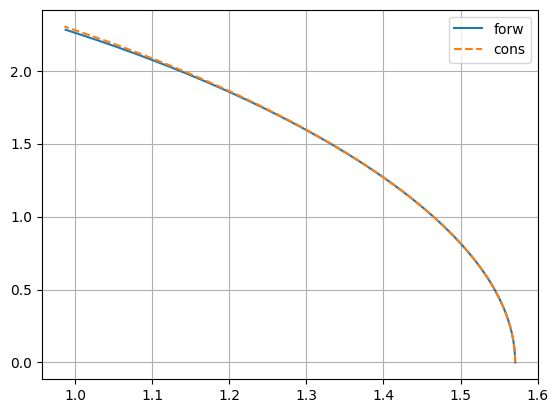

In [43]:
pendulum = PendulumSystem(
    g=9.81,
    l=2.0, 
    m=1.0,
    damping=0.1,
    max_control=2.0,
)

init_state = np.array([np.pi/2, 0])
dt = 0.0001
N = 5000
poses_cons = [init_state]
poses_forw = [init_state]
for i in range(N):
    poses_cons.append(pendulum.step(poses_cons[-1], 1, -dt))
    poses_forw.append(pendulum.step(poses_forw[ 0], 1, -i*dt))

poses_cons = np.array(poses_cons)
poses_forw = np.array(poses_forw)


plt.plot(poses_forw[:, 0], poses_forw[:, 1], label='forw')
plt.plot(poses_cons[:, 0], poses_cons[:, 1], label='cons', linestyle='--')
plt.legend()
plt.grid()
